# Jun 3 Plots

What is the impact of each eigenvector to the normalized spectral clustering algorithm? While incrementing $k$, the number of clusters, how do the clusterings change?

In [29]:
from lib.spectral_clustering import spectral_clustering, laplacian_matrix, similarity_matrix
from lib.datasets import gaussian_mixture
from lib.kmeans import kmeans
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib import cm
from tqdm import tqdm

## Data generation

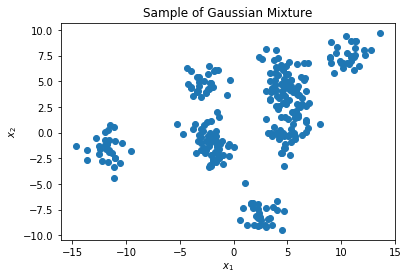

In [33]:
n_gaussians = 10
n_pts = 30
n = n_pts * n_gaussians
d = 2

data = gaussian_mixture(n_gaussians, n_pts, d, centroid_var=5)

plt.scatter(*data.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Sample of Gaussian Mixture")
plt.show()

## Extract and Visualize Eigenvectors

In [34]:
_, (evals, evecs) = spectral_clustering(data, k=n, lform="rw", with_eigen=True, metric="e")

## Top-k Eigenvalues


In [35]:
cmap = cm.get_cmap("tab20")
unif_colors = [cmap(intensity) for intensity in np.linspace(0, 1, n_gaussians)]

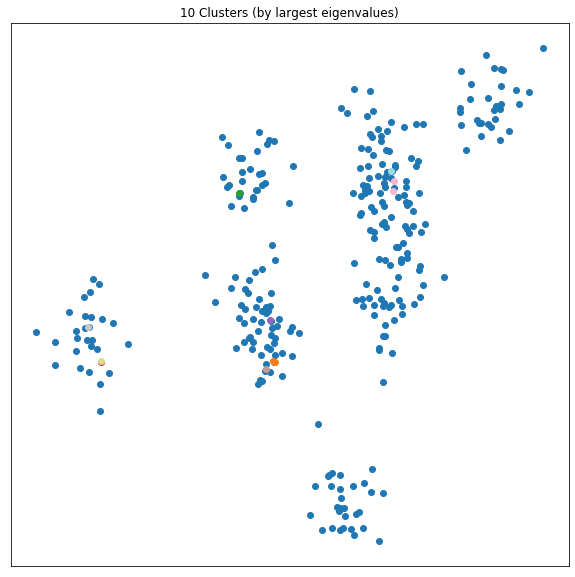

In [43]:
_, assns = kmeans(evecs[:, -n_gaussians:], n_gaussians, iters=100)
data_clusters = [ data[assns == clss].T for clss in range(n_gaussians) ]
plt.title(f"{n_gaussians} Clusters (by largest eigenvalues)")
plt.gca().set_xticks([], [])
plt.gca().set_yticks([], [])

for j, data_cluster in enumerate(data_clusters):
    plt.scatter(*data_cluster, color=unif_colors[j])

plt.gcf().set_size_inches(10, 10)
plt.savefig("Top_Eigenmap.png", dpi=120, bbox_inches=0)
plt.show()

# Bottom-k Eigenvalues

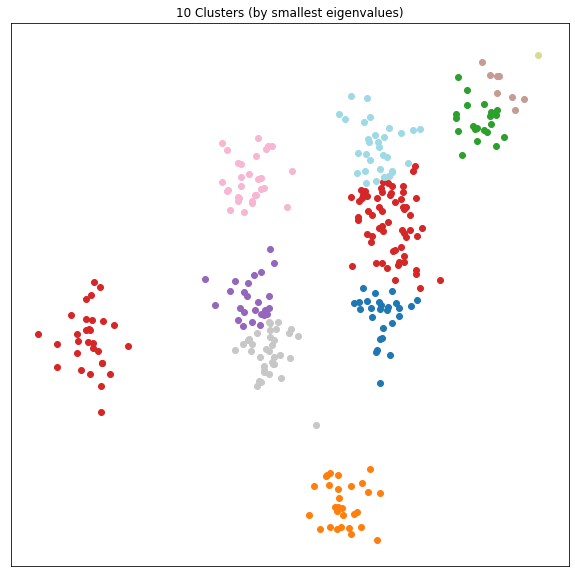

In [42]:
_, assns = kmeans(evecs[:, :n_gaussians], n_gaussians, iters=100)
data_clusters = [ data[assns == clss].T for clss in range(n_gaussians) ]
plt.title(f"{n_gaussians} Clusters (by smallest eigenvalues)")
plt.gca().set_xticks([], [])
plt.gca().set_yticks([], [])

for j, data_cluster in enumerate(data_clusters):
    plt.scatter(*data_cluster, color=unif_colors[j])

plt.gcf().set_size_inches(10, 10)
plt.savefig("Bottom_Eigenmap.png", dpi=120, bbox_inches=0)
plt.show()